#### Note:
> The solution is no different from the notebook using a single Dirichlet condition. This is to showcase that we can define mutliple ones.

On a unit square, $\Omega$, consider 
$$
-\nabla^{2} u = f
$$
, where $u = u_{D}^{L}$ in $\Gamma_{D}^{L}$, $u = u_{D}^{R}$ in $\Gamma_{D}^{R}$, and $-\partial u/\partial n = g$ on $\Gamma_{N}$.

Where the boundary, $\partial \Omega = \Gamma_{D} \cup \Gamma_{N}$.

$$
u_{D}^{L}(0,y) = 1 + 2y^{2}
$$

$$
u_{D}^{R}(1,y) = 2 + 2y^{2}
$$

And $\Gamma_{N}$ to be the subset of $\partial \Omega$ with the Neumann condition
$$
\frac{\partial u}{\partial n} =  g(x,y) = 
\begin{cases}
0 &y = 0\\
4 &y = 1
\end{cases}
$$
(To make defining the function FEniCS easier, let $g(x,y) = 4y$)

In [26]:
from fenics import *

In [27]:
mesh = UnitSquareMesh(8,8)
V = FunctionSpace(mesh, "CG", 2)

In [28]:
# our boundary condition
u_L = Expression('1 + 2*x[1]*x[1]', degree=2)
u_R = Expression('2 + 2*x[1]*x[1]', degree=2)
g = Expression('4*x[1]', degree=2)

In [29]:
def boundary_D_L(x, on_boundary):
    tolerance = 1E-14
    return on_boundary and near(x[0], 0, tolerance)

def boundary_D_R(x, on_boundary):
    tolerance = 1E-14
    return on_boundary and near(x[0], 1, tolerance)

bc_L = DirichletBC(V, u_L, boundary_D_L)
bc_R = DirichletBC(V, u_R, boundary_D_R)

In [30]:
# say that the trial solution is made of basis functions from the space V
u = TrialFunction(V)
# named ``v", but really they are the weighting functions w we are familiar with
v = TestFunction(V)
# forcing; we could have also used f = Expression("-6", degree=0)
f = Constant(-6.0)

# the bilinear form
# there is another function called inner
a = dot(grad(u), grad(v))*dx
# linear form 
# ds is the default for boundaries
# this term encodes our Neumann boundary condition
L = f*v*dx - g*v*ds

In [31]:
# compute solution
u = Function(V)
# pass both boundary conditions to solve
solve(a==L, u, [bc_L, bc_R])

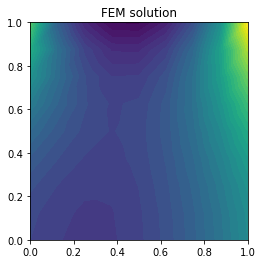

In [32]:
# we can also use paraview to look at our solution
plot(u,title = "FEM solution")

In [33]:
vtkfile = File('poisson.pvd')
vtkfile << u